In [1]:
# load the module
%load_ext autoreload
%autoreload 2

import Generating_Problems as Generator
import numpy as np
import matplotlib.pyplot as plt
import RQAOA
import networkx as nx
from QIRO_MIS import QIRO
from classical_solver import find_mis
import classical_benchmarks.Simulated_Annealing as SA
import classical_benchmarks.Parallel_Tempering as PT
import classical_benchmarks.greedy_mis as GM

### MIS

#### A simple test

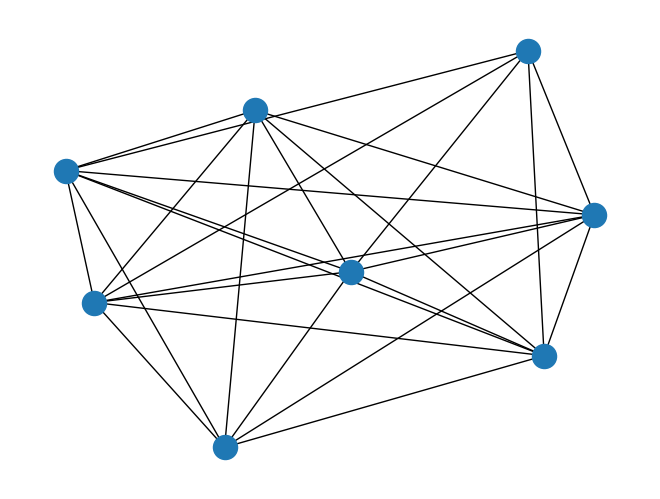

In [37]:
# create some test graph. Feel free to change this to whatever graph you want to visualize and use.

graph = nx.random_geometric_graph(8, 0.8)

nx.draw(graph)

In [38]:
problem = Generator.MIS(graph, alpha=1.1)

qiro = QIRO(problem, nc=4, strategy = "Max", no_correlation = 4,temperature = 8)

qiro.execute()
print("QIRO; Number of violations: {}. Size of IS found: {}".format(*problem.evaluate_solution(qiro.solution)))

QIRO; Number of violations: 0. Size of IS found: 2


In [39]:
GM.greedy_mis(graph)

2

In [11]:
np.linspace(50,50,1)

array([50.])

#### Experiments run 

In [2]:
def experiment_setup(no_graph,min_node,max_node,step_node,no_sample,radius = 0.4,alpha_value = 1.1,strategy = "Bolztmann",nc = 4, no_correlation = 5,temperature = 7):
    """
    This function is used to setup experiment and obtain the result 
    Input:
    - no_graph: The number of graph we want to test per setup 
    - min_node: The minimum number of nodes we want to test 
    - max_node: The maximum number of nodes we want to test 
    - step_node: The number of point we want to use in linspace(min_node,max_node,step_node)
    - no_sample: Number of run using QIRO per graph per setup 
    - strategy: The strategt we will use in QIRO, default is Bolztmann 
    - nc: The critical number of node 
    - no_correlation: maximum number of correlation terms we simplify at each iteration in QIRO
    - temperature: The pseudo-temperature in the Bolztmann strategy 
    """
    
    node_array = np.linspace(min_node,max_node,step_node)
    efficiency_array = np.zeros((step_node,no_graph,no_sample))
    for node_index in range(len(node_array)):
        no_node = int(node_array[node_index])

        for graph_index in range(no_graph): 
            # Setting up the graph and problem
            print(f"Node {no_node},Graph {graph_index}")
            graph = nx.random_geometric_graph(no_node, radius)
            problem = Generator.MIS(graph,alpha = alpha_value)
            # Obtain heuristic solution
            heuristic_solution = GM.greedy_mis(graph)
            # Set up QIRO run 
            for sample_index in range(no_sample):
                qiro = QIRO(problem,nc,strategy,no_correlation,temperature)
                qiro.execute()
                qiro_number_of_violations, qiro_size_of_set = problem.evaluate_solution(qiro.solution)
                if qiro_number_of_violations == 0:
                    efficiency_array[node_index,graph_index,sample_index] = qiro_size_of_set/heuristic_solution
                    
    return efficiency_array 

#### Experiment 1 
We use graph contain 40 nodes (i.e linspace(min_node,max_node,step_node). Radius = 0.4, Bolztmann strategy, alpha = 1.1, nc = 4, no_correlation = 5, temperature = 7. For each given number of node, we use 10 graphs, for each graph, we sample 20 times. 

In [16]:
efficiency_array_exp1 = experiment_setup(no_graph = 10,min_node = 40,max_node = 40, step_node = 1, no_sample = 20)

Node 40,Graph 0
Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9


In [18]:
np.save('data_experiment_1',efficiency_array_exp1)

In [22]:
efficiency_array_exp1 = efficiency_array_exp1[0,:,:]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

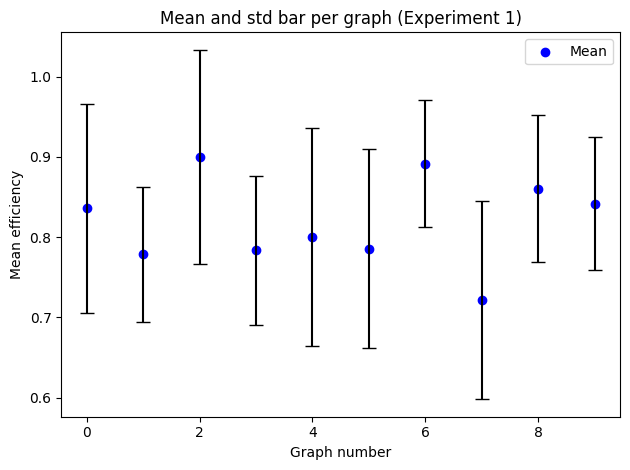

In [26]:
mean_value_exp1 = np.mean(efficiency_array_exp1,axis=1)
std_value_exp1 = np.std(efficiency_array_exp1,axis=1)
x_exp1 = np.arange(len(mean_value_exp1))
plt.scatter(x_exp1,mean_value_exp1,marker = 'o',color ='blue',label = 'Mean')
plt.errorbar(x_exp1,mean_value_exp1,yerr=std_value_exp1,fmt ='none',capsize=5,color='black')
plt.xlabel("Graph number")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Experiment 1)")
plt.tight_layout()
plt.legend()
plt.show()

#### Experiment 2
We use graph contain 40 nodes (i.e linspace(min_node,max_node,step_node). Radius = 0.4, Bolztmann strategy, alpha = 1.1, nc = 4, no_correlation = 1, temperature = 7. For each given number of node, we use 10 graphs, for each graph, we sample 20 times. 

In [27]:
efficiency_array_exp2 = experiment_setup(no_graph = 10,min_node = 40,max_node = 40, step_node = 1, no_sample = 20,no_correlation = 1)

Node 40,Graph 0
Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9


In [28]:
np.save('data_experiment_2',efficiency_array_exp2) 

In [29]:
efficiency_array_exp2 = efficiency_array_exp2[0,:,:]

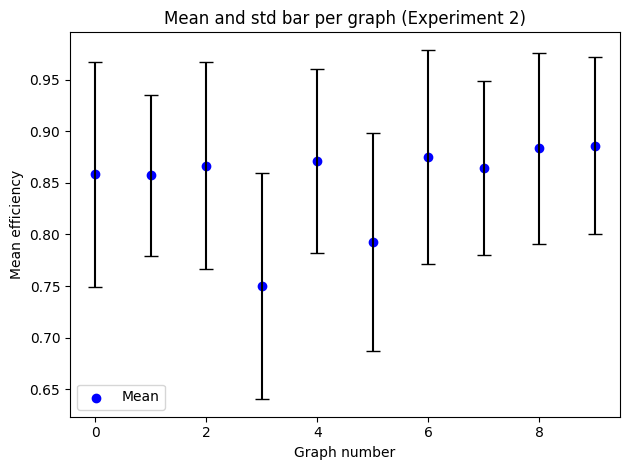

In [30]:
mean_value_exp2 = np.mean(efficiency_array_exp2,axis=1)
std_value_exp2 = np.std(efficiency_array_exp2,axis=1)
x_exp2 = np.arange(len(mean_value_exp2))
plt.scatter(x_exp2,mean_value_exp2,marker = 'o',color ='blue',label = 'Mean')
plt.errorbar(x_exp2,mean_value_exp2,yerr=std_value_exp2,fmt ='none',capsize=5,color='black')
plt.xlabel("Graph number")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Experiment 2)")
plt.tight_layout()
plt.legend()
plt.show()

#### Experiment 3
We use graph contain 40 nodes (i.e linspace(min_node,max_node,step_node). Radius = 0.4, Bolztmann strategy, alpha = 1.1, nc = 4, no_correlation = 5, temperature = 4. For each given number of node, we use 10 graphs, for each graph, we sample 20 times. 

In [ ]:
efficiency_array_exp3 = experiment_setup(no_graph = 10,min_node = 40,max_node = 40, step_node = 1, no_sample = 20, temperature = 4)

Node 40,Graph 0
Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9


In [ ]:
np.save('data_experiment_3',efficiency_array_exp3)

In [5]:
efficiency_array_exp3 = np.load('data_experiment_3.npy')
efficiency_array_exp3 = efficiency_array_exp3[0,:,:]

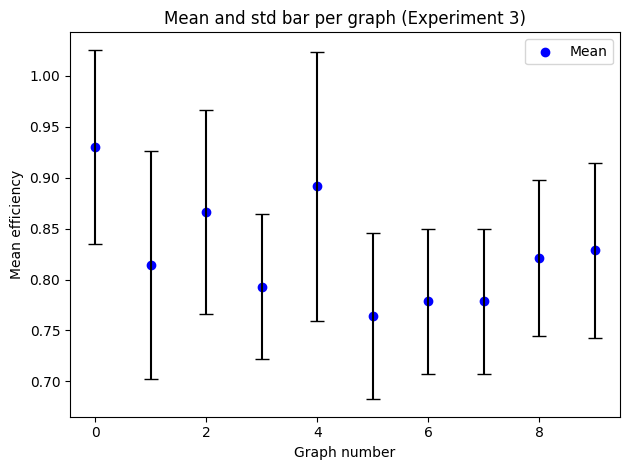

In [6]:
mean_value_exp3 = np.mean(efficiency_array_exp3,axis=1)
std_value_exp3 = np.std(efficiency_array_exp3,axis=1)
x_exp3 = np.arange(len(mean_value_exp3))
plt.scatter(x_exp3,mean_value_exp3,marker = 'o',color ='blue',label = 'Mean')
plt.errorbar(x_exp3,mean_value_exp3,yerr=std_value_exp3,fmt ='none',capsize=5,color='black')
plt.xlabel("Graph number")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Experiment 3)")
plt.tight_layout()
plt.legend()
plt.show()

#### Experiment 4
We use graph contain 40 nodes (i.e linspace(min_node,max_node,step_node). Radius = 0.4, Bolztmann strategy, alpha = 1.1, nc = 4, no_correlation = 5, temperature = 10. For each given number of node, we use 10 graphs, for each graph, we sample 20 times. 


In [26]:
efficiency_array_exp4 = experiment_setup(no_graph = 10,min_node = 40,max_node = 40, step_node = 1, no_sample = 20, temperature = 10)

Node 40,Graph 0
Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9


In [27]:
np.save('data_experiment_4',efficiency_array_exp4)

In [28]:
efficiency_array_exp4 = efficiency_array_exp4[0,:,:]

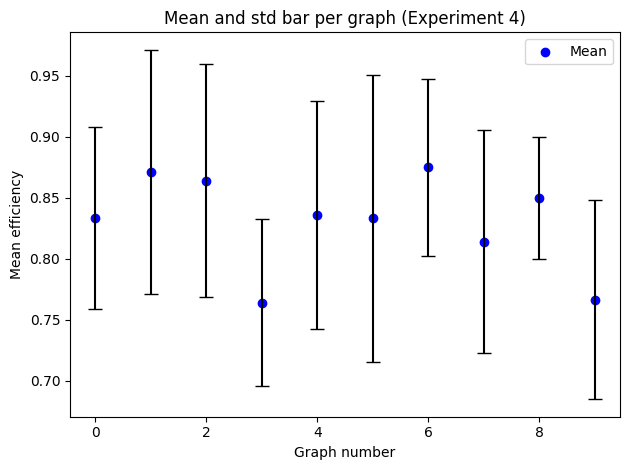

In [29]:
mean_value_exp4 = np.mean(efficiency_array_exp4,axis=1)
std_value_exp4 = np.std(efficiency_array_exp4,axis=1)
x_exp4 = np.arange(len(mean_value_exp4))
plt.scatter(x_exp4,mean_value_exp4,marker = 'o',color ='blue',label = 'Mean')
plt.errorbar(x_exp4,mean_value_exp4,yerr=std_value_exp4,fmt ='none',capsize=5,color='black')
plt.xlabel("Graph number")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Experiment 4)")
plt.tight_layout()
plt.legend()
plt.show()

#### Experiment 5
We use graph contain 40 nodes (i.e linspace(min_node,max_node,step_node). Radius = 0.5, Boltzmann strategy, alpha = 1.1, nc = 4, no_correlation = 5, temperature = 7. For each given number of node, we use 50 graphs, for each graph, we sample 1 times. 

In [6]:
efficiency_array_exp5 = experiment_setup(no_graph = 50, radius = 0.5,min_node = 40,max_node = 40, step_node = 1,strategy = 'Bolztmann', no_sample = 1)

Node 40,Graph 0
Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9
Node 40,Graph 10
Node 40,Graph 11
Node 40,Graph 12
Node 40,Graph 13
Node 40,Graph 14
Node 40,Graph 15
Node 40,Graph 16
Node 40,Graph 17
Node 40,Graph 18
Node 40,Graph 19
Node 40,Graph 20
Node 40,Graph 21
Node 40,Graph 22
Node 40,Graph 23
Node 40,Graph 24
Node 40,Graph 25
Node 40,Graph 26
Node 40,Graph 27
Node 40,Graph 28
Node 40,Graph 29
Node 40,Graph 30
Node 40,Graph 31
Node 40,Graph 32
Node 40,Graph 33
Node 40,Graph 34
Node 40,Graph 35
Node 40,Graph 36
Node 40,Graph 37
Node 40,Graph 38
Node 40,Graph 39
Node 40,Graph 40
Node 40,Graph 41
Node 40,Graph 42
Node 40,Graph 43
Node 40,Graph 44
Node 40,Graph 45
Node 40,Graph 46
Node 40,Graph 47
Node 40,Graph 48
Node 40,Graph 49


In [7]:
np.save('data_experiment_5',efficiency_array_exp5)

In [11]:
efficiency_array_exp5 = efficiency_array_exp5[0,:,0]

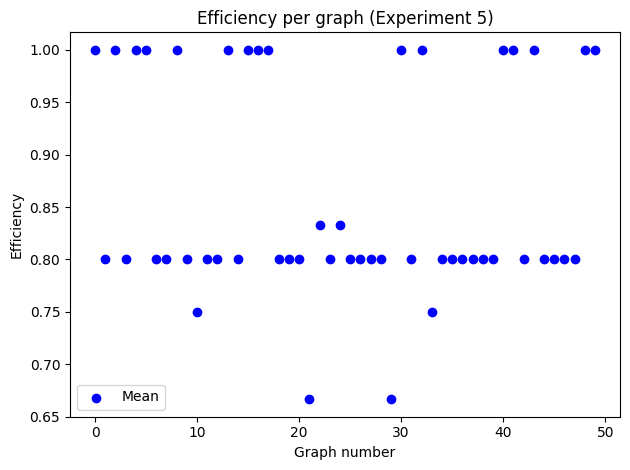

In [15]:
x_exp5 = np.arange(len(efficiency_array_exp5))
plt.scatter(x_exp5,efficiency_array_exp5,marker = 'o',color ='blue',label = 'Mean')
plt.xlabel("Graph number")
plt.ylabel("Efficiency")
plt.title("Efficiency per graph (Experiment 5)")
plt.tight_layout()
plt.legend()
plt.show()

#### Experiment 6
We use graph contain 40 nodes (i.e linspace(min_node,max_node,step_node). Radius = 0.3, Boltzmann strategy, alpha = 1.1, nc = 4, no_correlation = 5, temperature = 7. For each given number of node, we use 50 graphs, for each graph, we sample 1 times. 

In [8]:
efficiency_array_exp6 = experiment_setup(no_graph = 50, radius = 0.3, min_node = 40,max_node = 40, step_node = 1,strategy = 'Bolztmann', no_sample = 1)

Node 40,Graph 0
Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9
Node 40,Graph 10
Node 40,Graph 11
Node 40,Graph 12
Node 40,Graph 13
Node 40,Graph 14
Node 40,Graph 15
Node 40,Graph 16
Node 40,Graph 17
Node 40,Graph 18
Node 40,Graph 19
Node 40,Graph 20
Node 40,Graph 21
Node 40,Graph 22
Node 40,Graph 23
Node 40,Graph 24
Node 40,Graph 25
Node 40,Graph 26
Node 40,Graph 27
Node 40,Graph 28
Node 40,Graph 29
Node 40,Graph 30
Node 40,Graph 31
Node 40,Graph 32
Node 40,Graph 33
Node 40,Graph 34
Node 40,Graph 35
Node 40,Graph 36
Node 40,Graph 37
Node 40,Graph 38
Node 40,Graph 39
Node 40,Graph 40
Node 40,Graph 41
Node 40,Graph 42
Node 40,Graph 43
Node 40,Graph 44
Node 40,Graph 45
Node 40,Graph 46
Node 40,Graph 47
Node 40,Graph 48
Node 40,Graph 49


In [9]:
np.save('data_experiment_6',efficiency_array_exp6)

In [13]:
efficiency_array_exp6 = efficiency_array_exp6[0,:,0]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


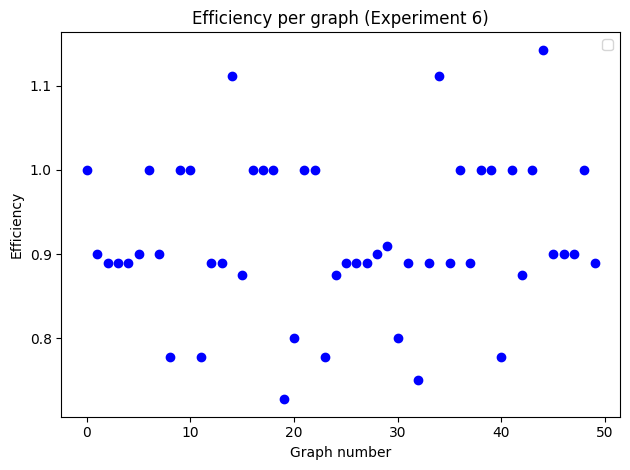

In [17]:
x_exp6 = np.arange(len(efficiency_array_exp6))
plt.scatter(x_exp6,efficiency_array_exp6,marker = 'o',color ='blue')
plt.xlabel("Graph number")
plt.ylabel("Efficiency")
plt.title("Efficiency per graph (Experiment 6)")
plt.tight_layout()
plt.legend()
plt.show()

#### Experiment 7
We use graph contain 40 nodes (i.e linspace(min_node,max_node,step_node). Radius = 0.4, Max strategy, alpha = 1.1, nc = 4, no_correlation = 5, temperature = 7. For each given number of node, we use 10 graphs, for each graph, we sample 20 times. 

In [21]:
efficiency_array_exp7 = experiment_setup(no_graph = 10,strategy = 'Max',min_node = 40,max_node = 40, step_node = 1, no_sample = 20)

Node 40,Graph 0
Node 40,Graph 1
Node 40,Graph 2
Node 40,Graph 3
Node 40,Graph 4
Node 40,Graph 5
Node 40,Graph 6
Node 40,Graph 7
Node 40,Graph 8
Node 40,Graph 9


In [22]:
np.save('data_experiment_7',efficiency_array_exp7)

In [23]:
efficiency_array_exp7 = efficiency_array_exp7[0,:,:]

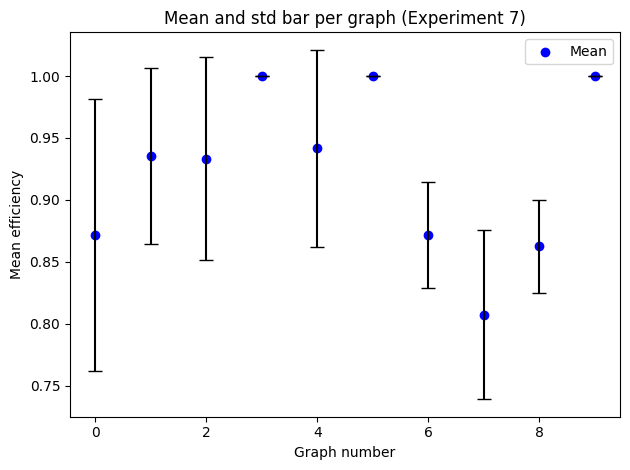

In [24]:
mean_value_exp7 = np.mean(efficiency_array_exp7,axis=1)
std_value_exp7 = np.std(efficiency_array_exp7,axis=1)
x_exp7 = np.arange(len(mean_value_exp7))
plt.scatter(x_exp7,mean_value_exp7,marker = 'o',color ='blue',label = 'Mean')
plt.errorbar(x_exp7,mean_value_exp7,yerr=std_value_exp7,fmt ='none',capsize=5,color='black')
plt.xlabel("Graph number")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Experiment 7)")
plt.tight_layout()
plt.legend()
plt.show()

#### Experiment 8
We use graph contain 20-60 nodes (i.e linspace(min_node,max_node,step_node). Radius = 0.4, Max strategy, alpha = 1.1, nc = 4, no_correlation = 5, temperature = 7. For each given number of node, we use 20 graphs, for each graph, we sample 1 times. 

In [26]:
efficiency_array_exp8 = experiment_setup(no_graph = 20,strategy = 'Max',min_node = 20,max_node = 60, step_node = 9, no_sample = 1)
np.save('data_experiment_8',efficiency_array_exp8)

Node 20,Graph 0
Node 20,Graph 1
Node 20,Graph 2
Node 20,Graph 3
Node 20,Graph 4
Node 20,Graph 5
Node 20,Graph 6
Node 20,Graph 7
Node 20,Graph 8
Node 20,Graph 9
Node 20,Graph 10
Node 20,Graph 11
Node 20,Graph 12
Node 20,Graph 13
Node 20,Graph 14
Node 20,Graph 15
Node 20,Graph 16
Node 20,Graph 17
Node 20,Graph 18
Node 20,Graph 19
Node 25,Graph 0
Node 25,Graph 1
Node 25,Graph 2
Node 25,Graph 3
Node 25,Graph 4
Node 25,Graph 5
Node 25,Graph 6
Node 25,Graph 7
Node 25,Graph 8
Node 25,Graph 9
Node 25,Graph 10
Node 25,Graph 11
Node 25,Graph 12
Node 25,Graph 13
Node 25,Graph 14
Node 25,Graph 15
Node 25,Graph 16
Node 25,Graph 17
Node 25,Graph 18
Node 25,Graph 19
Node 30,Graph 0
Node 30,Graph 1
Node 30,Graph 2
Node 30,Graph 3
Node 30,Graph 4
Node 30,Graph 5
Node 30,Graph 6
Node 30,Graph 7
Node 30,Graph 8
Node 30,Graph 9
Node 30,Graph 10
Node 30,Graph 11
Node 30,Graph 12
Node 30,Graph 13
Node 30,Graph 14
Node 30,Graph 15
Node 30,Graph 16
Node 30,Graph 17
Node 30,Graph 18
Node 30,Graph 19
Node 35,Gr

In [29]:
efficiency_array_exp8 = efficiency_array_exp8[:,:,0]

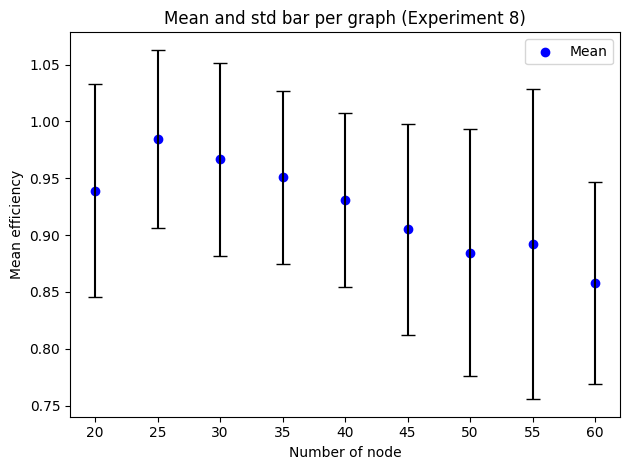

In [31]:
mean_value_exp8 = np.mean(efficiency_array_exp8,axis=1)
std_value_exp8 = np.std(efficiency_array_exp8,axis=1)
x_exp8 = np.linspace(20,60,9)
plt.scatter(x_exp8,mean_value_exp8,marker = 'o',color ='blue',label = 'Mean')
plt.errorbar(x_exp8,mean_value_exp8,yerr=std_value_exp8,fmt ='none',capsize=5,color='black')
plt.xlabel("Number of node")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Experiment 8)")
plt.tight_layout()
plt.legend()
plt.show()

#### Experiment 9
We use graph contain 20-60 nodes (i.e linspace(min_node,max_node,step_node). Radius = 0.4, Max strategy, alpha = 1.1, nc = 4, no_correlation = 1, temperature = 7. For each given number of node, we use 20 graphs, for each graph, we sample 1 times. 

In [27]:
efficiency_array_exp9 = experiment_setup(no_graph = 20,strategy = 'Max',min_node = 20,max_node = 60, step_node = 9, no_sample = 1,no_correlation = 1)
np.save('data_experiment_9',efficiency_array_exp9)

Node 20,Graph 0
Node 20,Graph 1
Node 20,Graph 2
Node 20,Graph 3
Node 20,Graph 4
Node 20,Graph 5
Node 20,Graph 6
Node 20,Graph 7
Node 20,Graph 8
Node 20,Graph 9
Node 20,Graph 10
Node 20,Graph 11
Node 20,Graph 12
Node 20,Graph 13
Node 20,Graph 14
Node 20,Graph 15
Node 20,Graph 16
Node 20,Graph 17
Node 20,Graph 18
Node 20,Graph 19
Node 25,Graph 0
Node 25,Graph 1
Node 25,Graph 2
Node 25,Graph 3
Node 25,Graph 4
Node 25,Graph 5
Node 25,Graph 6
Node 25,Graph 7
Node 25,Graph 8
Node 25,Graph 9
Node 25,Graph 10
Node 25,Graph 11
Node 25,Graph 12
Node 25,Graph 13
Node 25,Graph 14
Node 25,Graph 15
Node 25,Graph 16
Node 25,Graph 17
Node 25,Graph 18
Node 25,Graph 19
Node 30,Graph 0
Node 30,Graph 1
Node 30,Graph 2
Node 30,Graph 3
Node 30,Graph 4
Node 30,Graph 5
Node 30,Graph 6
Node 30,Graph 7
Node 30,Graph 8
Node 30,Graph 9
Node 30,Graph 10
Node 30,Graph 11
Node 30,Graph 12
Node 30,Graph 13
Node 30,Graph 14
Node 30,Graph 15
Node 30,Graph 16
Node 30,Graph 17
Node 30,Graph 18
Node 30,Graph 19
Node 35,Gr

In [32]:
efficiency_array_exp9 = efficiency_array_exp9[:,:,0]

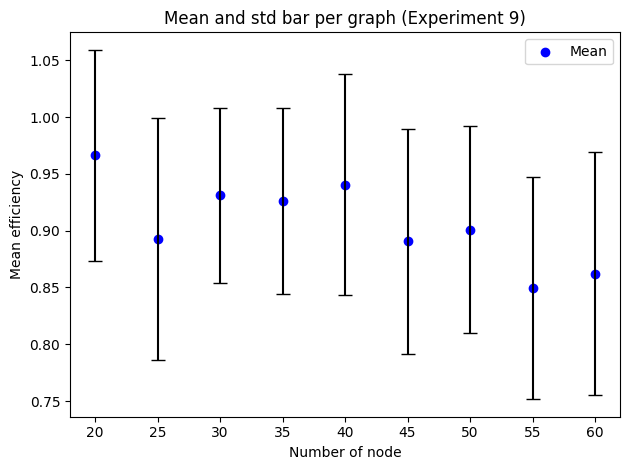

In [33]:
mean_value_exp9 = np.mean(efficiency_array_exp9,axis=1)
std_value_exp9 = np.std(efficiency_array_exp9,axis=1)
x_exp9 = np.linspace(20,60,9)
plt.scatter(x_exp9,mean_value_exp9,marker = 'o',color ='blue',label = 'Mean')
plt.errorbar(x_exp9,mean_value_exp9,yerr=std_value_exp9,fmt ='none',capsize=5,color='black')
plt.xlabel("Number of node")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Experiment 9)")
plt.tight_layout()
plt.legend()
plt.show()

#### Experiment 10
We use graph contain 20-60 nodes (i.e linspace(min_node,max_node,step_node). Radius = 0.4, Bolztmann strategy, alpha = 1.1, nc = 4, no_correlation = 5, temperature = 3. For each given number of node, we use 20 graphs, for each graph, we sample 5 times. 

In [28]:
efficiency_array_exp10 = experiment_setup(no_graph = 20,strategy = 'Bolztmann',min_node = 20,max_node = 60, step_node = 9, no_sample = 5,no_correlation = 5,temperature = 3)
np.save('data_experiment_10',efficiency_array_exp10)

Node 20,Graph 0
Node 20,Graph 1
Node 20,Graph 2
Node 20,Graph 3
Node 20,Graph 4
Node 20,Graph 5
Node 20,Graph 6
Node 20,Graph 7
Node 20,Graph 8
Node 20,Graph 9
Node 20,Graph 10
Node 20,Graph 11
Node 20,Graph 12
Node 20,Graph 13
Node 20,Graph 14
Node 20,Graph 15
Node 20,Graph 16
Node 20,Graph 17
Node 20,Graph 18
Node 20,Graph 19
Node 25,Graph 0
Node 25,Graph 1
Node 25,Graph 2
Node 25,Graph 3
Node 25,Graph 4
Node 25,Graph 5
Node 25,Graph 6
Node 25,Graph 7
Node 25,Graph 8
Node 25,Graph 9
Node 25,Graph 10
Node 25,Graph 11
Node 25,Graph 12
Node 25,Graph 13
Node 25,Graph 14
Node 25,Graph 15
Node 25,Graph 16
Node 25,Graph 17
Node 25,Graph 18
Node 25,Graph 19
Node 30,Graph 0
Node 30,Graph 1
Node 30,Graph 2
Node 30,Graph 3
Node 30,Graph 4
Node 30,Graph 5
Node 30,Graph 6
Node 30,Graph 7
Node 30,Graph 8
Node 30,Graph 9
Node 30,Graph 10
Node 30,Graph 11
Node 30,Graph 12
Node 30,Graph 13
Node 30,Graph 14
Node 30,Graph 15
Node 30,Graph 16
Node 30,Graph 17
Node 30,Graph 18
Node 30,Graph 19
Node 35,Gr

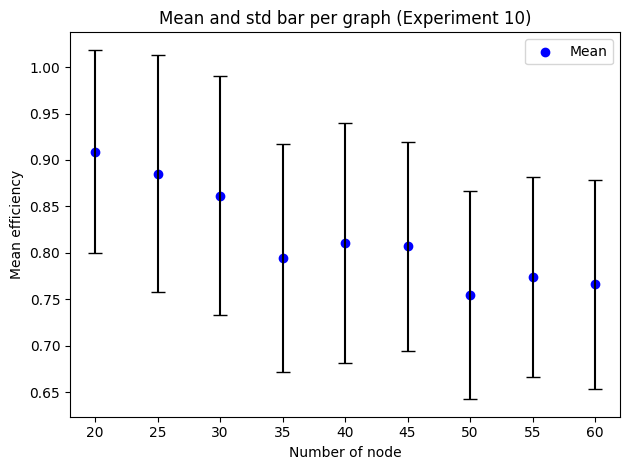

In [35]:
mean_value_exp10 = np.mean(efficiency_array_exp10,axis=(1,2))
std_value_exp10 = np.std(efficiency_array_exp10,axis=(1,2))
x_exp10 = np.linspace(20,60,9)
plt.scatter(x_exp10,mean_value_exp10,marker = 'o',color ='blue',label = 'Mean')
plt.errorbar(x_exp10,mean_value_exp10,yerr=std_value_exp10,fmt ='none',capsize=5,color='black')
plt.xlabel("Number of node")
plt.ylabel("Mean efficiency")
plt.title("Mean and std bar per graph (Experiment 10)")
plt.tight_layout()
plt.legend()
plt.show()